- 참조: https://wikidocs.net/53560

# PyTorch로 선형 회귀 구현하기


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 재실행시 같은 결과가 나오도록 랜덤 시드(random seed) 
torch.manual_seed(1)

## 1. 변수 선언

In [3]:
## 변수 선언 및 크기 확인
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(f' - x train: {x_train}, \n - y train: {y_train}')
print(f' - x train shape: {x_train.shape}, \n - y train shape: {y_train.shape}')

 - x train: tensor([[1.],
        [2.],
        [3.]]), 
 - y train: tensor([[2.],
        [4.],
        [6.]])
 - x train shape: torch.Size([3, 1]), 
 - y train shape: torch.Size([3, 1])


## 2. 가중치(`W`)와 편향(`b`) 초기화
- `y = Wx + b`
- 선형 회귀(Linear Regression): 학습 데이터와 가장 일치하는 1차 직선 찾는 일
- 가중치(`W`): 직선의 기울기



In [4]:
## 가중치(W), 편향(b)를 0으로 초기화, 학습을 통해 값이 변경되는 변수임을 명시
# `requires_grad=True` 는 autograd 에 모든 연산(operation)들을 추적해야 한다고 알려줌
W = torch.zeros(1, requires_grad=True)  # grad (gradient, 변화도)
b = torch.zeros(1, requires_grad=True)
# 출력
print(W) 
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


## 3. 가설(`H`) 세우기
- `H(x) = Wx + b`

In [5]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## 4. 비용 함수(cost function) 선언 


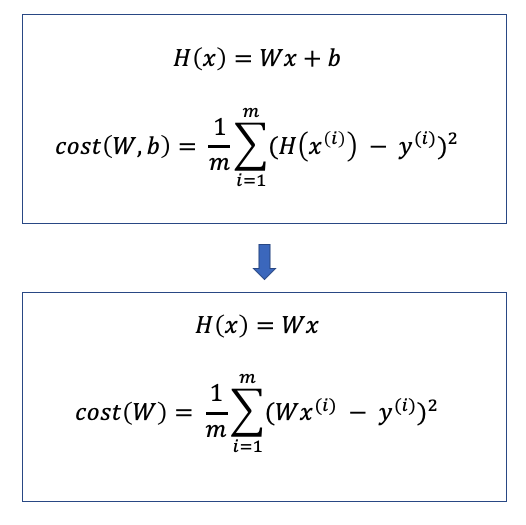









In [6]:
# 앞서 배운 torch.mean으로 평균을 구하기
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


## 5. 경사 하강법 구현
- 학습룰(learning rate): `lr`
- `Epoch`: 전체 훈련 데이터가 학습에 한번 사용된 주기


In [7]:
## SGD - 경사 하강법의 일종 
# lr=0.01
optimizer = optim.SGD([W, b], lr=0.01)

In [8]:
# gradient를 0으로 초기화 - `.zero_grad()` 
optimizer.zero_grad() 

# 비용 함수를 미분하여 gradient 계산
cost.backward() 

# W와 b를 업데이트
optimizer.step() 

In [9]:
# epochs 설정 
nb_epochs = 1999 # 원하는 epochs의 수만큼 경사하강법 반복
for epoch in range(nb_epochs + 1):
  # 가설 H(x) 계산 
  hypithesis = x_train * W + b

  # 비용함수 cost 계산
  cost = torch.mean( (hypithesis - y_train) **2 )

  # cost로 H(x) 개선 
  optimizer.zero_grad()  # gradient를 0으로 초기화
  cost.backward()        # cost 미분 
  optimizer.step()

  # 100번 마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} | W: {:.3f} |  b: {:.3f} | Cost: {:.6f}'.format(
      epoch, nb_epochs, W.item(), b.item(), cost.item()
    ))   




Epoch    0/1999 | W: 0.353 |  b: 0.151 | Cost: 14.770963
Epoch  100/1999 | W: 1.746 |  b: 0.577 | Cost: 0.047939
Epoch  200/1999 | W: 1.801 |  b: 0.453 | Cost: 0.029624
Epoch  300/1999 | W: 1.843 |  b: 0.356 | Cost: 0.018306
Epoch  400/1999 | W: 1.877 |  b: 0.280 | Cost: 0.011312
Epoch  500/1999 | W: 1.903 |  b: 0.220 | Cost: 0.006990
Epoch  600/1999 | W: 1.924 |  b: 0.173 | Cost: 0.004319
Epoch  700/1999 | W: 1.940 |  b: 0.136 | Cost: 0.002669
Epoch  800/1999 | W: 1.953 |  b: 0.107 | Cost: 0.001649
Epoch  900/1999 | W: 1.963 |  b: 0.084 | Cost: 0.001019
Epoch 1000/1999 | W: 1.971 |  b: 0.066 | Cost: 0.000630
Epoch 1100/1999 | W: 1.977 |  b: 0.052 | Cost: 0.000389
Epoch 1200/1999 | W: 1.982 |  b: 0.041 | Cost: 0.000240
Epoch 1300/1999 | W: 1.986 |  b: 0.032 | Cost: 0.000149
Epoch 1400/1999 | W: 1.989 |  b: 0.025 | Cost: 0.000092
Epoch 1500/1999 | W: 1.991 |  b: 0.020 | Cost: 0.000057
Epoch 1600/1999 | W: 1.993 |  b: 0.016 | Cost: 0.000035
Epoch 1700/1999 | W: 1.995 |  b: 0.012 | Cost: 

In [11]:
# 최종 훈련 결과 -> 최적의 기울기 W = 2, b = 0 
# x_train은 [[1], [2], [3]],  y_train은 [[2], [4], [6]]
# H(x) = 2x ==> 거의 정답 맞춤!!

## `optimizer.zero_grad()`의 필요 이유
- PyTorch -> 미분을 통해 얻인 기울기 누적의 특징 

In [14]:
## 예시
w = torch.tensor(2.0, requires_grad  = True )

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  # 기울기=2 일차함수 
  z = 2*w

  # 미분하기
  z.backward()

  print(f'z = 2*W -> 2 미분 값: {w.grad}')

z = 2*W -> 2 미분 값: 2.0
z = 2*W -> 2 미분 값: 4.0
z = 2*W -> 2 미분 값: 6.0
z = 2*W -> 2 미분 값: 8.0
z = 2*W -> 2 미분 값: 10.0
z = 2*W -> 2 미분 값: 12.0
z = 2*W -> 2 미분 값: 14.0
z = 2*W -> 2 미분 값: 16.0
z = 2*W -> 2 미분 값: 18.0
z = 2*W -> 2 미분 값: 20.0
z = 2*W -> 2 미분 값: 22.0
z = 2*W -> 2 미분 값: 24.0
z = 2*W -> 2 미분 값: 26.0
z = 2*W -> 2 미분 값: 28.0
z = 2*W -> 2 미분 값: 30.0
z = 2*W -> 2 미분 값: 32.0
z = 2*W -> 2 미분 값: 34.0
z = 2*W -> 2 미분 값: 36.0
z = 2*W -> 2 미분 값: 38.0
z = 2*W -> 2 미분 값: 40.0
z = 2*W -> 2 미분 값: 42.0


In [15]:
# => 미분 값 2 누적 확인 가능 
# ==> `optimizer.zero_grad()`를 통해 미분 값 0으로 초기화 해주어야 함!!

## `torch.manual_seed()` 사용 이유
- `torch.manual_seed()` 사용한 프로그램의 결과 -> 다른 컴퓨터에서 실행시켜도 동일한 결과 얻을 수 있음
- 난수 발생의 순거롸 동일한 값을 보장하는 특징 때문 


In [16]:
## random seed = 3 인 경우
torch.manual_seed(3)
print('random seed = 3 인 경우')

for i in range(1,3):
  print(torch.rand(1))

random seed = 3 인 경우
tensor([0.0043])
tensor([0.1056])


In [18]:
## random seed = 5 인 경우
torch.manual_seed(5)
print('random seed = 5 인 경우')

for i in range(1,3):
  print(torch.rand(1))

random seed = 5 인 경우
tensor([0.8303])
tensor([0.1261])


In [19]:
## 다시 random seed = 3 로 초기화
# --> 프로그램을 처음부터 시작한 것 처럼 난수 발생 순서 초기화
torch.manual_seed(3)
print('random seed = 3 인 경우')

for i in range(1,3):
  print(torch.rand(1))

random seed = 3 인 경우
tensor([0.0043])
tensor([0.1056])
